### **Replicate AlexNET and train it on the CIFAR10 Dataset**

AlexNet was the 2012 ImageNet winner achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up!

![](https://paperswithcode.com/media/methods/Screen_Shot_2020-06-22_at_6.35.45_PM.png)

![](https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg)

### **1. Import Laberies, Load Dataset and Preprocesse the data**

#### **Import Laberies**

In [ ]:
# Plotting our loss charts
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras.api._v2.keras as keras

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from keras.optimizers import Adadelta, Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

#### **Load Dataset and Preprocesse the data**

In [ ]:
# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print("Data Set:")
print('train samples: ', x_train.shape[0])
print('test samples: ', x_test.shape[0])
print('x_train shape:', x_train.shape)

x_train = np.array([cv2.resize(img, (227, 227)) for img in x_train])
x_test = np.array([cv2.resize(img, (227, 227)) for img in x_test])

print("\nResizing images..")
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# Now we one hot encode outputs
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

np.random.seed(1000)

# Define the labels of CIFAR-10 datasest
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Data Set:
train samples:  50000
test samples:  10000
x_train shape: (50000, 32, 32, 3)

Resizing images..
x_train shape: (50000, 227, 227, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 227, 227, 3)
y_test shape: (10000, 1)


#### **Display some images from our dataset**

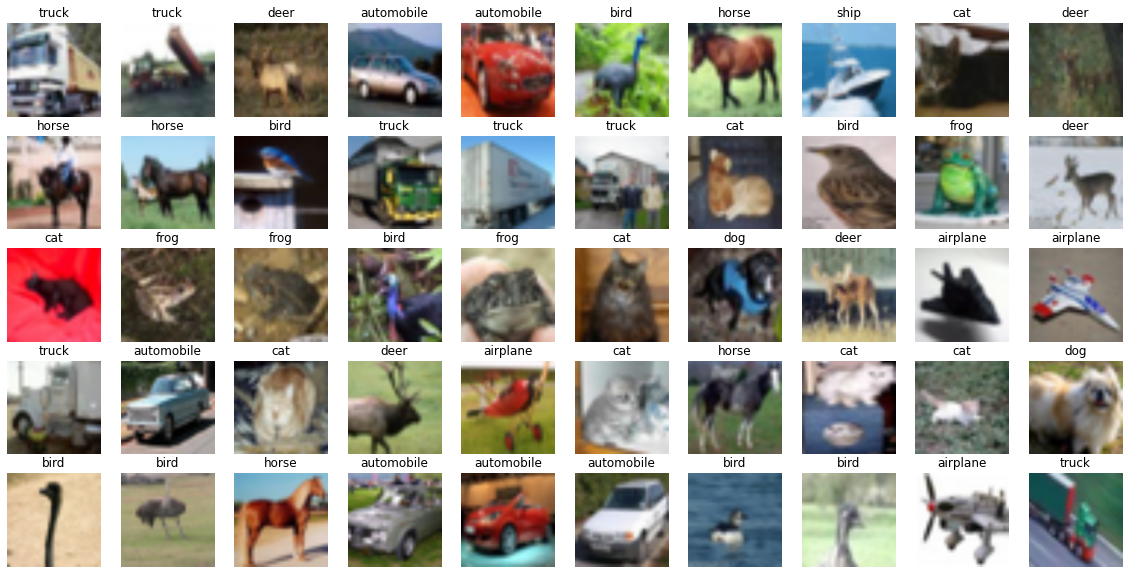

In [ ]:
# Define figure size
plt.figure(figsize=(20,10))

# Define number of images to display
num_of_images = 50

# iterate index from 1 to 51 to show the first 50 images from training dataset
for index in range(1, num_of_images +1):
  plt.subplot(5, 10, index).set_title(labels[np.argmax(y_train[index])])
  plt.axis('off')
  plt.imshow(x_train[index])


### **2. Build AlexNet**

In [ ]:
# Implements base AlexNet model
l2_reg = 0.001

# Initialize model
model = Sequential()

# 1st Conv Layer 
model.add(Conv2D(96, (11, 11), input_shape=x_train.shape[1:], strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))

# 2nd Conv Layer 
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))

# 3rd Conv Layer 
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(Activation('relu'))

# 4th Conv Layer 
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(Activation('relu'))

# 5th Conv Layer 
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))

# Passing it to full connected layer
model.add(Flatten())

# 1st FC Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3rd FC Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=2,
                   verbose=1,
                   mode='auto')

print(model.summary())
# Test loss: 0.9170026779174805
# Test accuracy: 0.7612500190734863

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 28, 28, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                    

### **3. Train The Model**

In [ ]:
# Training Parameters
epochs = 20
batch_size = 64

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks = [es])


# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/20
157/157 [==============================] - 25s 99ms/step - loss: 2.4614 - accuracy: 0.2532 - val_loss: 1.6610 - val_accuracy: 0.3920
Epoch 2/20
157/157 [==============================] - 13s 81ms/step - loss: 1.6078 - accuracy: 0.4073 - val_loss: 1.4404 - val_accuracy: 0.4640
Epoch 3/20
157/157 [==============================] - 13s 82ms/step - loss: 1.4125 - accuracy: 0.4858 - val_loss: 1.2921 - val_accuracy: 0.5535
Epoch 4/20
157/157 [==============================] - 13s 83ms/step - loss: 1.2252 - accuracy: 0.5616 - val_loss: 1.1940 - val_accuracy: 0.5795
Epoch 5/20
157/157 [==============================] - 13s 84ms/step - loss: 1.0836 - accuracy: 0.6176 - val_loss: 1.3740 - val_accuracy: 0.5310
Epoch 6/20
157/157 [==============================] - 13s 85ms/step - loss: 0.9316 - accuracy: 0.6717 - val_loss: 1.0319 - val_accuracy: 0.6485
Epoch 7/20
157/157 [==============================] - 13s 85ms/step - loss: 0.7629 - accuracy: 0.7364 - val_loss: 1.0497 - val_accuracy:

### **4. Model Performance Analysis**

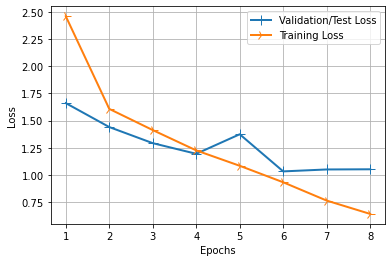

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

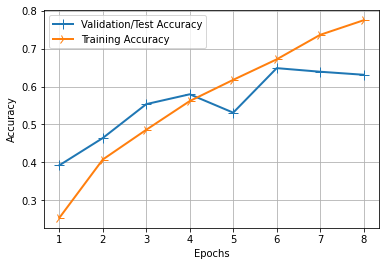

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## **5. Reduce Overfitting**

#### As we see, our model perfoms 77% training accuracy but our validation accuracy 63% wich is lower and  means our model is overfitting. Overfitting means our model performs good on the training data set but fails to generalize on the unseen data. We can try to reduce overfitting by usuin three main ways:

1. Add more data
2. Decrease model complexity
3. Apply regularization

Option 1 and 2 are not a good fit in our case, since getting more data is very tough and out model is not that complex to reduce the architecture. So lets try to reduce overfitting by using regulazation techniqe. we will use:
1. L1 & L2 Regularisation
2. Data Augmentation
3. Drop Out
4. Early Stopping
5. Batch Normalisation

#### **Build The Model**

In [ ]:
l2_reg = 0.0001

# Initialize model
model = Sequential()

# 1st Conv Layer 
model.add(Conv2D(128, (11, 11), input_shape=x_train.shape[1:], padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer 
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th Conv Layer 
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st FC Layer
model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3rd FC Layer
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# print(model.summary())
# , kernel_regularizer=l2(l2_reg)
# 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics = ['accuracy'])


es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=2,
                   verbose=1,
                   mode='auto')



#### **Training the model with using Data Augmentation**

In [ ]:
epochs = 50
batch_size = 128

# Define Data Generator for Augmentation
train_datagen = ImageDataGenerator( rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# Fit the model
# Notice we use train_datagen.flow, this takes data & label arrays, generates batches of augmented data.
history = model.fit(train_datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs,
                              callbacks = [es],
                              validation_data = (x_test, y_test),
                              verbose = 1,
                              steps_per_epoch = x_train.shape[0] // batch_size)

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
390/390 [==============================] - 493s 1s/step - loss: 1.4192 - accuracy: 0.5231 - val_loss: 1.7438 - val_accuracy: 0.3585
Epoch 2/50
390/390 [==============================] - 480s 1s/step - loss: 1.0954 - accuracy: 0.6702 - val_loss: 1.2282 - val_accuracy: 0.6467
Epoch 3/50
390/390 [==============================] - 479s 1s/step - loss: 0.9672 - accuracy: 0.7172 - val_loss: 1.2203 - val_accuracy: 0.6133
Epoch 4/50
390/390 [==============================] - 480s 1s/step - loss: 0.8766 - accuracy: 0.7516 - val_loss: 1.0754 - val_accuracy: 0.6894
Epoch 5/50
390/390 [==============================] - 479s 1s/step - loss: 0.8044 - accuracy: 0.7772 - val_loss: 1.1011 - val_accuracy: 0.6736
Epoch 6/50
390/390 [==============================] - 479s 1s/step - loss: 0.7448 - accuracy: 0.7972 - val_loss: 1.0666 - val_accuracy: 0.6760
Epoch 7/50
390/390 [==============================] - 479s 1s/step - loss: 0.6906 - accuracy: 0.8154 - val_loss: 0.9560 - val_accuracy: 0.7269

### **7. Save the Model**

In [ ]:
model.save("AlexNet_CIFAR_10.h5")
print("Model Saved")

Model Saved


### **6. Model Performance Analysis**

In [ ]:
# Import our load_model function 
from keras.models import load_model

# We can load the built in datasets from this function
from keras.datasets import cifar10

# Load our model
model = load_model('AlexNet_CIFAR_10.h5')

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = np.array([cv2.resize(img, (227, 227)) for img in x_train])
x_test = np.array([cv2.resize(img, (227, 227)) for img in x_test])

np.random.seed(1000)

# Define the labels of CIFAR-10 datasest
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### **Ploting our Loss and Accuracy Charts**

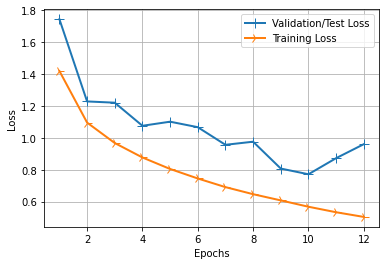

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

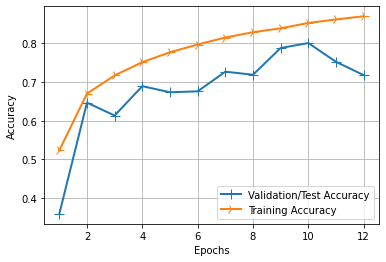

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

#### **Creating our Confusion Matrix**


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

x_test = x_test.reshape(10000, 227, 227, 3) 
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 9s 29ms/step
[[907   1  31   5  31   0   6  17   1   1]
 [ 20 931  10   5  12   0  11   7   1   3]
 [ 51   0 747   4 137   1  49  11   0   0]
 [ 24   2  83 520 209   3 111  48   0   0]
 [  5   1  14   2 953   0  13  12   0   0]
 [ 16   1 167 181 215 281  56  83   0   0]
 [  5   0  14   5  49   0 922   5   0   0]
 [  4   0  20   8  92   0   7 869   0   0]
 [413  23  45   6  68   0  32  25 386   2]
 [ 66 122  22  17  57   0  10  40   2 664]]


In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

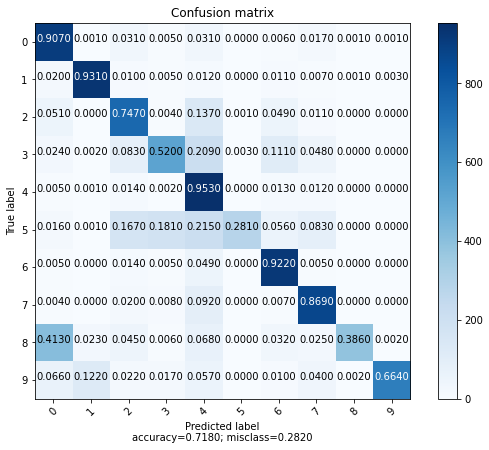

In [ ]:
target_names = list(range(0,10))
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, target_names)

#### **Let's look at our per-class accuracy**

In [ ]:
# Per-class accuracy
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i, classAccuracy) in enumerate(class_accuracy):
    print(f'Accuracy for {labels[i]} : {classAccuracy:.3f}%')

Accuracy for airplane : 90.700%
Accuracy for automobile : 93.100%
Accuracy for bird : 74.700%
Accuracy for cat : 52.000%
Accuracy for deer : 95.300%
Accuracy for dog : 28.100%
Accuracy for frog : 92.200%
Accuracy for horse : 86.900%
Accuracy for ship : 38.600%
Accuracy for truck : 66.400%


#### **Visualizing the Images Our Model Misclassified**

In [ ]:
import numpy as np

# Reshape y_test to the y_pred shape
y_test = np.reshape(y_test, (1, 10000))

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test[0] - y_pred)
misclassified_indices = np.nonzero(0 < result)

print(f"Indices of misclassifed data are: \n{misclassified_indices}")
print(len(misclassified_indices[0]))

Indices of misclassifed data are: 
(array([   1,    2,    7, ..., 9989, 9993, 9995]),)
2820


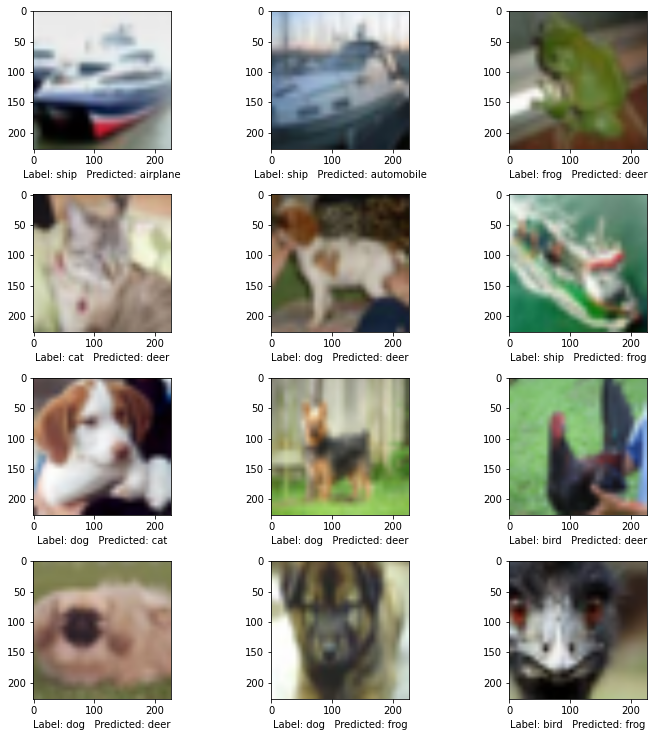

In [ ]:
i = 0
plt.figure(figsize=(10, 15))

for cel in misclassified_indices[0]:

    index = misclassified_indices[0][i]
    image = x_test[index]
    label = labels[y_test[0][index]]
    predicted = labels[y_pred[index]]
    plt.subplot(6, 3, i+1)
    plt.imshow(image)
    plt.xlabel("Label: " + label + "   Predicted: " + predicted)
    i +=1
    if i == 12:
      break

plt.tight_layout()
plt.show()